In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Patient data individual/2024-Data/CSV_Files/Final preprocessed data.csv')

In [ ]:
average_height = df['Height'].mean()

In [ ]:
average_height

161.1578947368421

In [ ]:
def calculate_pefr(row):
    height_m = row['Height'] / 100  # Convert height to meters
    if row['Age'] <= 18:  # Children
        return ((row['Height'] - 100) * 5) + 100
    elif row['Sex'] == 'M':  # Adult Men
        return (((height_m * 5.48) + 1.58) - (row['Age'] * 0.041)) * 60
    elif row['Sex'] == 'F':  # Adult Women
        return (((height_m * 3.72) + 2.24) - (row['Age'] * 0.03)) * 60
    else:
        return None  # Handle unexpected cases

# Apply the function to each row
df['Normal PEFR'] = df.apply(calculate_pefr, axis=1)


In [ ]:
# Calculate the difference between Normal PEFR and Average PEFR
df['Difference'] = df['Normal PEFR'] - df['Average C.PEFR']

In [ ]:
# Determine thresholds using quantiles
low_threshold = df['Difference'].quantile(0.33)  # Bottom 33% is Low
high_threshold = df['Difference'].quantile(0.67)  # Top 33% is High

# Define clusters for Difference values
def cluster_difference(value):
    if value > high_threshold:
        return 'High'
    elif value < low_threshold:
        return 'Low'
    else:
        return 'Moderate'

# Apply clustering to the Difference column
df['Cluster'] = df['Difference'].apply(cluster_difference)


In [ ]:
df

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,...,altitude,Altitude_Category,Average C.PEFR,Standard Deviation PEFR,mean_temperature,mean_humidity,AQI,Normal PEFR,Difference,Cluster
0,0,SB-001,14631875,BC4386476,43,M,NS,0,156,76,...,749.0,Low Altitude,350.83,37.07,11.35,73.50,No data,501.948,151.118,High
1,1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,...,15.0,Low Altitude,501.31,72.37,11.16,68.82,0.002,468.384,-32.926,Low
2,2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,...,10.0,Low Altitude,467.17,20.37,11.28,72.08,0.29,513.564,46.394,Moderate
3,3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,...,38.0,Low Altitude,320.15,24.40,10.92,72.40,0.0049,441.156,121.006,High
4,4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,...,15.0,Low Altitude,320.15,9.08,11.16,68.82,0.002,477.348,157.198,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,...,21.0,Low Altitude,258.81,19.83,11.16,68.82,0.34,436.404,177.594,High
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,...,15.0,Low Altitude,258.81,19.83,11.16,68.82,No data,354.720,95.910,High
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,...,8.0,Low Altitude,258.81,19.83,11.16,68.82,No data,405.984,147.174,High
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,...,15.0,Low Altitude,258.81,19.83,11.16,68.82,0.002,389.640,130.830,High


In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'BCODE', 'UID1', 'Age', 'Sex', 'Smoke',
       'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA', 'occupation',
       'occupation_english', 'address', 'address_english', 'Age_group',
       'BMI_category', 'Smoking_intensity', 'latitude', 'longitude',
       'altitude', 'Altitude_Category', 'Average C.PEFR',
       'Standard Deviation PEFR', 'mean_temperature', 'mean_humidity', 'AQI',
       'Normal PEFR', 'Difference', 'Cluster'],
      dtype='object')

In [ ]:
columns = ['Age', 'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA',
           'latitude', 'longitude', 'altitude', 'Average C.PEFR',
           'Standard Deviation PEFR', 'mean_temperature', 'mean_humidity', 'AQI']


In [ ]:
df['Asthma']='yes'

In [ ]:
df

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,...,Altitude_Category,Average C.PEFR,Standard Deviation PEFR,mean_temperature,mean_humidity,AQI,Normal PEFR,Difference,Cluster,Asthma
0,0,SB-001,14631875,BC4386476,43,M,NS,0,156,76,...,Low Altitude,350.83,37.07,11.35,73.50,No data,501.948,151.118,High,yes
1,1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,...,Low Altitude,501.31,72.37,11.16,68.82,0.002,468.384,-32.926,Low,yes
2,2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,...,Low Altitude,467.17,20.37,11.28,72.08,0.29,513.564,46.394,Moderate,yes
3,3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,...,Low Altitude,320.15,24.40,10.92,72.40,0.0049,441.156,121.006,High,yes
4,4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,...,Low Altitude,320.15,9.08,11.16,68.82,0.002,477.348,157.198,High,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,...,Low Altitude,258.81,19.83,11.16,68.82,0.34,436.404,177.594,High,yes
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,...,Low Altitude,258.81,19.83,11.16,68.82,No data,354.720,95.910,High,yes
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,...,Low Altitude,258.81,19.83,11.16,68.82,No data,405.984,147.174,High,yes
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,...,Low Altitude,258.81,19.83,11.16,68.82,0.002,389.640,130.830,High,yes


In [ ]:
df.tail()

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,...,Altitude_Category,Average C.PEFR,Standard Deviation PEFR,mean_temperature,mean_humidity,AQI,Normal PEFR,Difference,Cluster,Asthma
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,...,Low Altitude,258.81,19.83,11.16,68.82,0.34,436.404,177.594,High,yes
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,...,Low Altitude,258.81,19.83,11.16,68.82,No data,354.720,95.910,High,yes
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,...,Low Altitude,258.81,19.83,11.16,68.82,No data,405.984,147.174,High,yes
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,...,Low Altitude,258.81,19.83,11.16,68.82,0.002,389.640,130.830,High,yes
113,113,SB-141,14000223,BC3294749,71,F,NS,0,162,73,...,Low Altitude,258.81,19.83,11.16,68.82,0.002,368.184,109.374,High,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               114 non-null    int64  
 1   ID                       114 non-null    object 
 2   BCODE                    114 non-null    object 
 3   UID1                     114 non-null    object 
 4   Age                      114 non-null    int64  
 5   Sex                      114 non-null    object 
 6   Smoke                    114 non-null    object 
 7   Smoke_amount             114 non-null    int64  
 8   Height                   114 non-null    int64  
 9   Weight                   114 non-null    int64  
 10  BMI                      114 non-null    float64
 11  BSA                      114 non-null    float64
 12  occupation               114 non-null    object 
 13  occupation_english       114 non-null    object 
 14  address                  1

<ipython-input-18-27e7367e3b87>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(X_scaled)


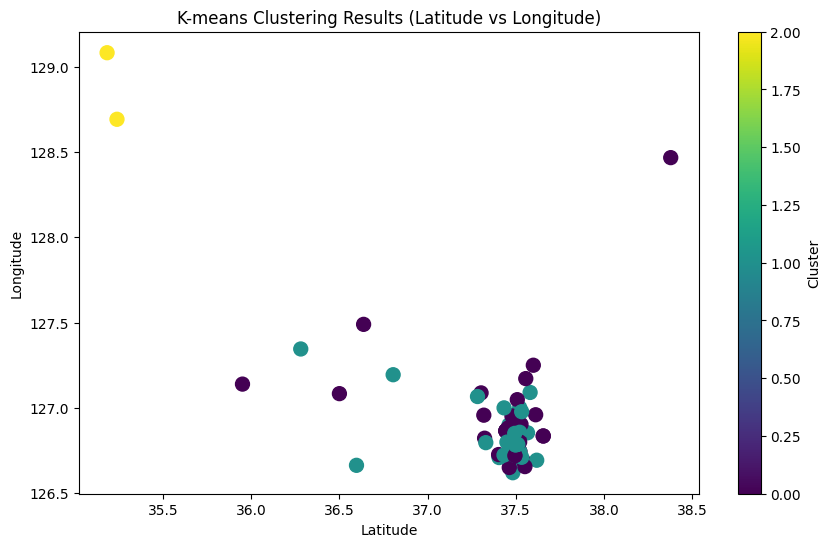

         ID   latitude   longitude  altitude  Cluster
1    SB-002  37.498890  126.783060      15.0        0
2    SB-003  37.474580  126.680240      10.0        1
3    SB-004  37.548639  126.682664      38.0        0
4    SB-005  37.498890  126.783060      15.0        1
5    SB-006  37.581780  127.090340      33.0        1
..      ...        ...         ...       ...      ...
105  SB-130  37.450230  126.799080      32.0        1
107  SB-132  37.495180  126.720070      17.0        0
109  SB-135  37.512130  126.785189      21.0        1
112  SB-140  37.498890  126.783060      15.0        1
113  SB-141  37.498890  126.783060      15.0        1

[97 rows x 5 columns]


In [ ]:
import numpy as np

# Selecting relevant numeric columns for clustering
numeric_columns = ['Age', 'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA',
                   'latitude', 'longitude', 'altitude', 'Average C.PEFR',
                   'Standard Deviation PEFR', 'mean_temperature', 'mean_humidity', 'AQI']

# Replacing non-numeric values with NaN and converting columns to numeric
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handling missing values: Drop rows with missing values in key numeric columns
df = df.dropna(subset=numeric_columns)

# Extracting only numeric columns for clustering
X = df[numeric_columns]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df['latitude'], df['longitude'], c=df['Cluster'], cmap='viridis', s=100)
plt.title("K-means Clustering Results (Latitude vs Longitude)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.colorbar(label="Cluster")
plt.show()

# Displaying the clustered dataset
print(df[['ID', 'latitude', 'longitude', 'altitude', 'Cluster']])


Cluster Analysis (Numeric Features):
           altitude  mean_temperature  mean_humidity          AQI  \
Cluster                                                             
0         19.692308         11.170385      70.841154     3.101304   
1         26.616667         11.205833      68.782167     1.869518   
2        133.444444         10.816667      70.244444     3.499300   
3         28.000000         10.990000      70.745000  9999.000000   

         Average C.PEFR  Standard Deviation PEFR  Asthma  
Cluster                                                   
0            489.370385                50.099615     1.0  
1            319.815500                22.288667     1.0  
2            328.822222                32.833333     1.0  
3            328.370000                44.530000     1.0  

Age Group Distribution Across Clusters:
Age_Group  Children  Young Adults  Middle-aged  Elderly
Cluster                                                
0                 0             1        

<ipython-input-19-ec7a9ac53b3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Asthma'] = df['Asthma'].map({'yes': 1, 'no': 0})
<ipython-input-19-ec7a9ac53b3d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


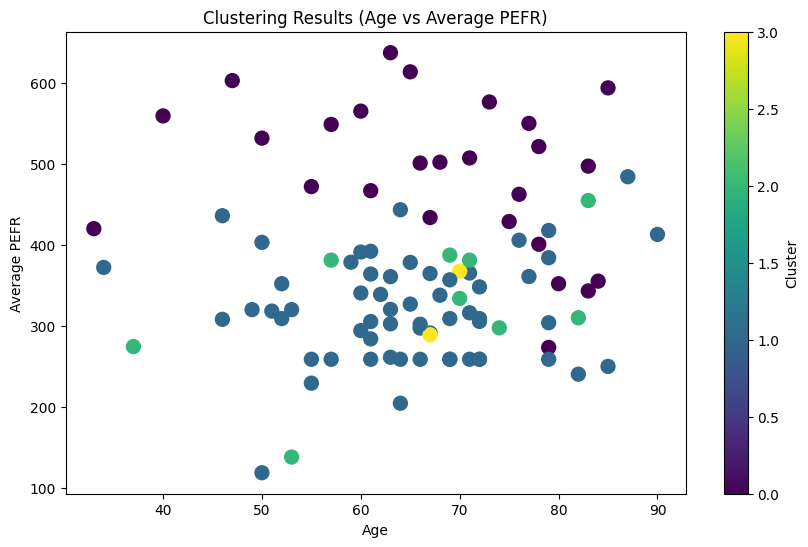

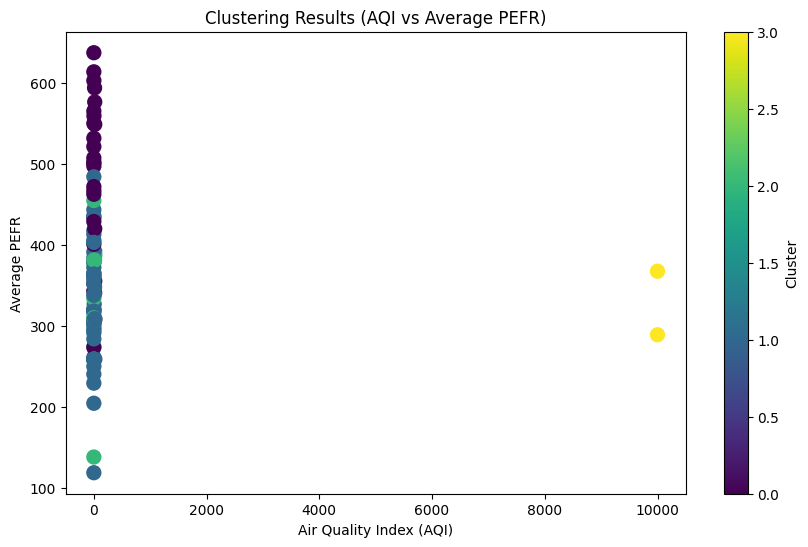

In [ ]:
df['Asthma'] = df['Asthma'].map({'yes': 1, 'no': 0})

# Columns to use for clustering (including 'asthma')
clustering_columns = ['Age', 'altitude', 'mean_temperature', 'mean_humidity', 'AQI',
                      'Average C.PEFR', 'Standard Deviation PEFR', 'Asthma']

# Convert non-numeric values to NaN and ensure columns are numeric
for col in clustering_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in the clustering columns
df = df.dropna(subset=clustering_columns)

# Create Age Group column
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100],
                         labels=['Children', 'Young Adults', 'Middle-aged', 'Elderly'])

# Encode Age_Group as numeric for clustering
df['Age_Group_Numeric'] = df['Age_Group'].cat.codes

# Data for clustering
X = df[['Age_Group_Numeric', 'altitude', 'mean_temperature', 'mean_humidity',
        'AQI', 'Average C.PEFR', 'Standard Deviation PEFR', 'Asthma']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster analysis: Aggregating numeric features
cluster_analysis = df.groupby('Cluster')[
    ['altitude', 'mean_temperature', 'mean_humidity', 'AQI',
     'Average C.PEFR', 'Standard Deviation PEFR', 'Asthma']
].mean()

# Age Group distribution across clusters
age_group_counts = df.groupby('Cluster')['Age_Group'].value_counts().unstack()

# Display the results in the console
print("Cluster Analysis (Numeric Features):")
print(cluster_analysis)

print("\nAge Group Distribution Across Clusters:")
print(age_group_counts)

# Visualization: Age vs Average PEFR
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Average C.PEFR'], c=df['Cluster'], cmap='viridis', s=100)
plt.title("Clustering Results (Age vs Average PEFR)")
plt.xlabel("Age")
plt.ylabel("Average PEFR")
plt.colorbar(label="Cluster")
plt.show()

# Visualization: AQI vs Average PEFR
plt.figure(figsize=(10, 6))
plt.scatter(df['AQI'], df['Average C.PEFR'], c=df['Cluster'], cmap='viridis', s=100)
plt.title("Clustering Results (AQI vs Average PEFR)")
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("Average PEFR")
plt.colorbar(label="Cluster")
plt.show()


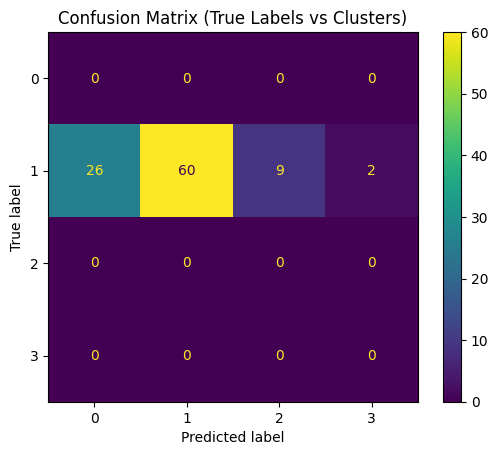

Accuracy: 0.62
Precision: 1.00
Recall: 0.62
Silhouette Score: 0.25
Davies-Bouldin Index: 1.33


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

if 'Asthma' in df.columns:
    true_labels = df['Asthma']  # Replace 'Asthma' with your actual true label column if different
    predicted_labels = df['Cluster']  # Predicted cluster labels from K-means

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Ensure the labels for the confusion matrix are consistent
    unique_labels = sorted(set(true_labels) | set(predicted_labels))

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    disp.plot(cmap="viridis")
    plt.title("Confusion Matrix (True Labels vs Clusters)")
    plt.show()

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)

    # Display the scores
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
else:
    print("No 'Asthma' column found in the dataset. Cannot generate confusion matrix.")

# Evaluate clustering quality
# Silhouette Score measures how similar data points are within clusters
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])

# Davies-Bouldin Index measures the compactness and separation of clusters (lower is better)
davies_bouldin_avg = davies_bouldin_score(X_scaled, df['Cluster'])

# Display clustering quality metrics
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")


In [ ]:
from sklearn.metrics.pairwise import manhattan_distances, cosine_distances
distances = manhattan_distances(X)

In [ ]:
print(distances)

[[  0.      94.808  256.9529 ... 301.378  295.04   295.04  ]
 [ 94.808    0.     181.0151 ... 223.33   217.568  217.568 ]
 [256.9529 181.0151   0.     ...  88.0651  93.7329  93.7329]
 ...
 [301.378  223.33    88.0651 ...   0.       6.338    6.338 ]
 [295.04   217.568   93.7329 ...   6.338    0.       0.    ]
 [295.04   217.568   93.7329 ...   6.338    0.       0.    ]]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 1 to 113
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Unnamed: 0               97 non-null     int64   
 1   ID                       97 non-null     object  
 2   BCODE                    97 non-null     object  
 3   UID1                     97 non-null     object  
 4   Age                      97 non-null     int64   
 5   Sex                      97 non-null     object  
 6   Smoke                    97 non-null     object  
 7   Smoke_amount             97 non-null     int64   
 8   Height                   97 non-null     int64   
 9   Weight                   97 non-null     int64   
 10  BMI                      97 non-null     float64 
 11  BSA                      97 non-null     float64 
 12  occupation               97 non-null     object  
 13  occupation_english       97 non-null     object  
 14  address         

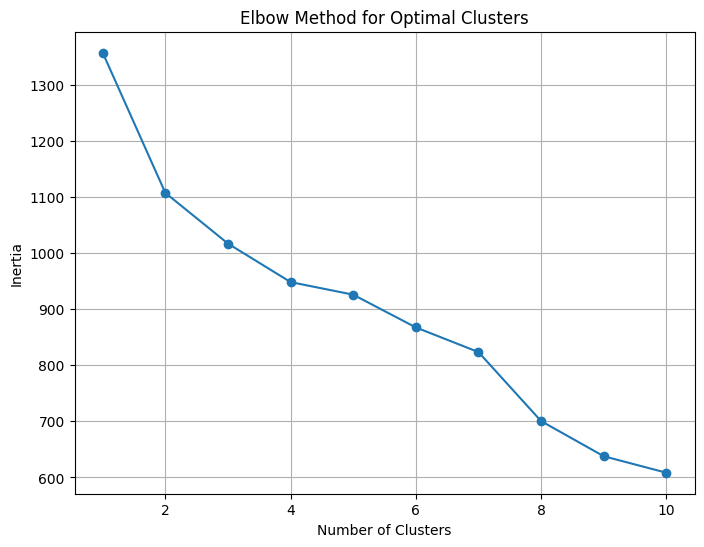

    Age  Sex  Smoke_amount  Height  Weight        BMI       BSA  \
1  66.0    1           0.0   163.0    58.0  21.829952  1.620528   
2  61.0    1          20.0   173.0    67.0  22.386314  1.794358   
3  49.0    1           0.0   142.0    51.0  25.292601  1.418332   
4  53.0    1           0.0   156.0    70.0  28.763971  1.741647   
5  64.0    1          17.0   172.0    80.0  27.041644  1.955050   

   occupation_english  Age_group  BMI_category  ...  Standard Deviation PEFR  \
1                   9          2             0  ...                    72.37   
2                  31          2             0  ...                    20.37   
3                  23          1             2  ...                    24.40   
4                  10          1             2  ...                     9.08   
5                   9          2             2  ...                    37.22   

   mean_temperature  mean_humidity     AQI  Normal PEFR  Difference  Cluster  \
1             11.16          68.82  

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Drop specified columns from the DataFrame
columns_to_drop = [
    'Unnamed: 0', 'ID', 'BCODE', 'UID1', 'Smoke', 'occupation',
    'address', 'Smoking_intensity', 'latitude', 'longitude',
    'address_english', 'Altitude_Category'
]
df = df.drop(columns=columns_to_drop, axis=1)

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Handle missing values for numerical columns
num_imputer = SimpleImputer(strategy='mean')  # Use 'mean' for numerical columns
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

# Handle missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')  # Use 'most_frequent' for categorical columns
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Standardize numerical data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df[numerical_columns])

# Determine the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_data)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Perform KMeans clustering with the optimal number of clusters (e.g., 3)
optimal_clusters = 3  # Set this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(standardized_data)

# Display clustered data
print(df.head())

# Save the clustered data to a CSV file
df.to_csv("clustered_data.csv", index=False)


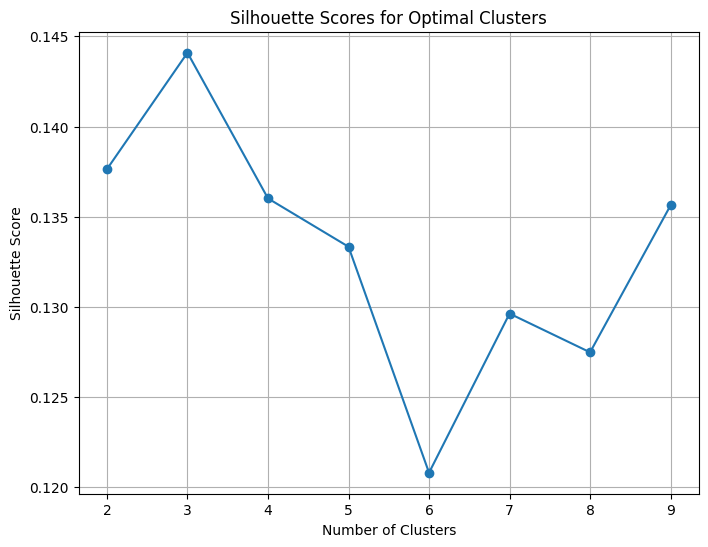

Optimal Number of Clusters: 3
Clustered DataFrame:
      Age  Sex  Smoke_amount  Height  Weight        BMI       BSA  \
1    66.0    1           0.0   163.0    58.0  21.829952  1.620528   
2    61.0    1          20.0   173.0    67.0  22.386314  1.794358   
3    49.0    1           0.0   142.0    51.0  25.292601  1.418332   
4    53.0    1           0.0   156.0    70.0  28.763971  1.741647   
5    64.0    1          17.0   172.0    80.0  27.041644  1.955050   
..    ...  ...           ...     ...     ...        ...       ...   
105  69.0    0          10.0   165.0    75.0  27.548209  1.854050   
107  61.0    0           0.0   154.0    40.0  16.866251  1.308094   
109  79.0    1           0.0   163.0    67.0  25.217359  1.741726   
112  69.0    0          15.0   170.0    72.0  24.913495  1.843909   
113  71.0    0           0.0   162.0    73.0  27.815882  1.812457   

     occupation_english  Age_group  BMI_category  ...  \
1                     9          2             0  ...   
2     

In [ ]:
# Standardize numerical columns
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaled_features = scaler.fit_transform(df[numerical_columns])

# Optimize number of clusters using silhouette score
silhouette_scores = []
cluster_range = range(2, 10)  # Start with 2 clusters as silhouette is undefined for 1 cluster

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Finalize clustering with optimal number of clusters
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Save or display results
print("Optimal Number of Clusters:", optimal_clusters)
print("Clustered DataFrame:")
print(df)


print("Clustered data saved to 'clustered_data.csv'.")

In [ ]:
# Finalize clustering with optimal number of clusters
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Find the best features based on cluster centroids
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(cluster_centers, columns=numerical_columns)

# Calculate variance of features across centroids
centroid_variance = centroids_df.var().sort_values(ascending=False)

print("Optimal Number of Clusters:", optimal_clusters)
print("\nClustered DataFrame Head:")
print(df.head())

print("\nBest Features Based on Variance Across Clusters:")
print(centroid_variance)


print("Feature importance saved to 'feature_importance.csv'.")

Optimal Number of Clusters: 3

Clustered DataFrame Head:
    Age  Sex  Smoke_amount  Height  Weight        BMI       BSA  \
1  66.0    1           0.0   163.0    58.0  21.829952  1.620528   
2  61.0    1          20.0   173.0    67.0  22.386314  1.794358   
3  49.0    1           0.0   142.0    51.0  25.292601  1.418332   
4  53.0    1           0.0   156.0    70.0  28.763971  1.741647   
5  64.0    1          17.0   172.0    80.0  27.041644  1.955050   

   occupation_english  Age_group  BMI_category  ...  Standard Deviation PEFR  \
1                   9          2             0  ...                    72.37   
2                  31          2             0  ...                    20.37   
3                  23          1             2  ...                    24.40   
4                  10          1             2  ...                     9.08   
5                   9          2             2  ...                    37.22   

   mean_temperature  mean_humidity     AQI  Normal PEFR  Di

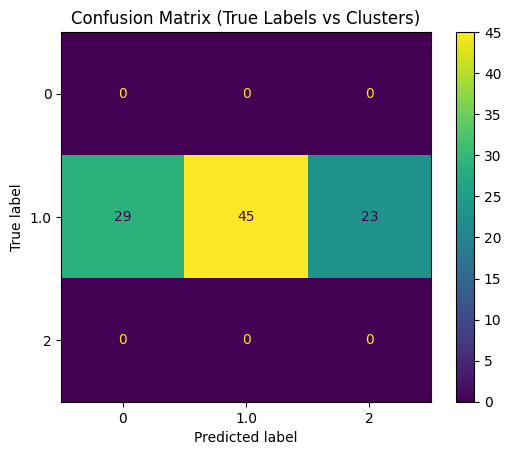

Accuracy: 0.46
Precision: 1.00
Recall: 0.46
Silhouette Score: 0.12
Davies-Bouldin Index: 2.29


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

if 'Asthma' in df.columns:
    true_labels = df['Asthma']  # Replace 'Asthma' with your actual true label column if different
    predicted_labels = df['Cluster']  # Predicted cluster labels from K-means

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Ensure the labels for the confusion matrix are consistent
    unique_labels = sorted(set(true_labels) | set(predicted_labels))

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    disp.plot(cmap="viridis")
    plt.title("Confusion Matrix (True Labels vs Clusters)")
    plt.show()

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)

    # Display the scores
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
else:
    print("No 'Asthma' column found in the dataset. Cannot generate confusion matrix.")

# Evaluate clustering quality
# Silhouette Score measures how similar data points are within clusters
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])

# Davies-Bouldin Index measures the compactness and separation of clusters (lower is better)
davies_bouldin_avg = davies_bouldin_score(X_scaled, df['Cluster'])

# Display clustering quality metrics
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay,
)
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import mode


In [ ]:
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaled_features = scaler.fit_transform(df[numerical_columns])


In [ ]:
if 'Asthma' in df.columns and len(df['Asthma'].unique()) > 1:
    from imblearn.over_sampling import SMOTE

    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(scaled_features, df['Asthma'])
    print(f"Original class distribution: {df['Asthma'].value_counts()}")
    print(f"Resampled class distribution: {pd.Series(y_resampled).value_counts()}")
else:
    print("Skipping SMOTE as 'Asthma' column has only one class or does not exist.")
    X_resampled = scaled_features
    y_resampled = df['Asthma'] if 'Asthma' in df.columns else None

Skipping SMOTE as 'Asthma' column has only one class or does not exist.


In [ ]:
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X_resampled)

In [ ]:
from scipy.stats import mode
import numpy as np

# Function to map clusters to true labels
def map_clusters_to_labels(cluster_labels, true_labels):
    mapping = {}
    for cluster in np.unique(cluster_labels):
        mask = cluster_labels == cluster
        if np.any(mask):  # Check if there are any points in the cluster
            cluster_labels_for_mapping = true_labels[mask]
            if len(cluster_labels_for_mapping) > 0:  # Avoid empty clusters
                common_label = mode(cluster_labels_for_mapping, keepdims=True).mode[0]
                mapping[cluster] = common_label
            else:
                mapping[cluster] = -1  # Assign a placeholder for empty clusters
        else:
            mapping[cluster] = -1  # Handle edge cases where cluster is empty
    return np.array([mapping[label] for label in cluster_labels])

# Replace this function in the earlier script



KMeans Clustering:
Accuracy: 0.43
Precision: 1.00
Recall: 0.43


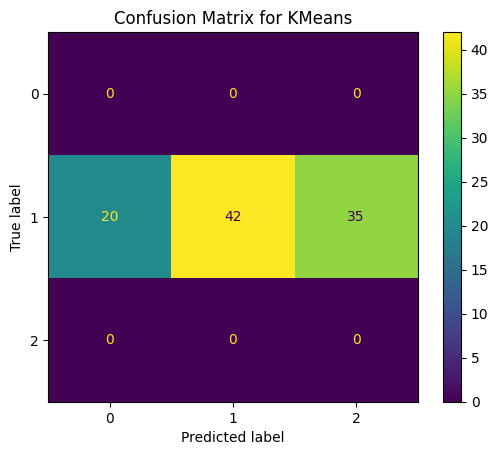


DBSCAN Clustering:
Accuracy: 0.00
Precision: 0.00
Recall: 0.00


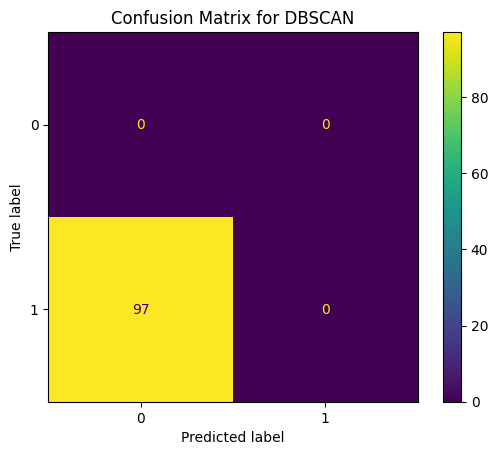


GMM Clustering:
Accuracy: 0.64
Precision: 1.00
Recall: 0.64


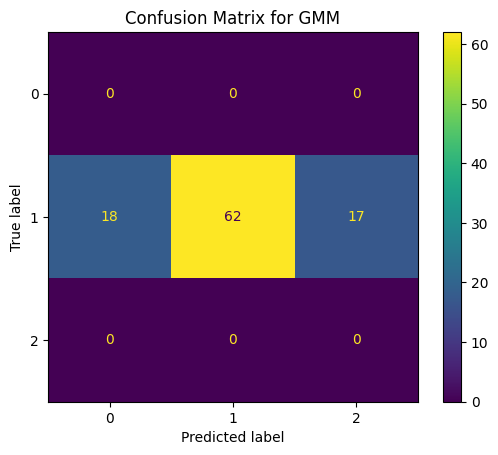

In [ ]:
# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust clusters as needed
kmeans_labels = kmeans.fit_predict(standardized_data)

# Perform clustering using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(standardized_data)

# Perform clustering using Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust components as needed
gmm_labels = gmm.fit_predict(standardized_data)

# Function to map clusters to ground truth labels
def map_clusters_to_labels(predicted_labels, true_labels):
    from scipy.optimize import linear_sum_assignment
    import numpy as np

    contingency_matrix = confusion_matrix(true_labels, predicted_labels)
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)
    mapping = {col: row for col, row in zip(col_ind, row_ind)}
    mapped_labels = np.array([mapping[label] if label in mapping else -1 for label in predicted_labels])
    return mapped_labels

# Align clusters for each algorithm
kmeans_mapped = map_clusters_to_labels(kmeans_labels, y_resampled)
dbscan_mapped = map_clusters_to_labels(dbscan_labels, y_resampled)
gmm_mapped = map_clusters_to_labels(gmm_labels, y_resampled)

# Evaluate Accuracy, Precision, Recall
for name, predicted_labels in zip(
    ["KMeans", "DBSCAN", "GMM"], [kmeans_mapped, dbscan_mapped, gmm_mapped]
):
    accuracy = accuracy_score(y_resampled, predicted_labels)
    precision = precision_score(y_resampled, predicted_labels, average="weighted", zero_division=0)
    recall = recall_score(y_resampled, predicted_labels, average="weighted", zero_division=0)
    print(f"\n{name} Clustering:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_resampled, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="viridis")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

Silhouette Scores: [0.3484099896615569, 0.4073353857372256, 0.42273324331794637, 0.4396907971603968, 0.4036189035627964, 0.34407705321204, 0.4048882581464085, 0.4109595972489716, 0.39668325371459656]
Davies-Bouldin Scores: [1.2308346047714365, 0.8215092391363189, 0.7770102012253426, 0.7112619112546051, 0.7413895262466269, 0.9319561603832912, 0.7004129320371664, 0.7159549483266218, 0.7132959520409741]


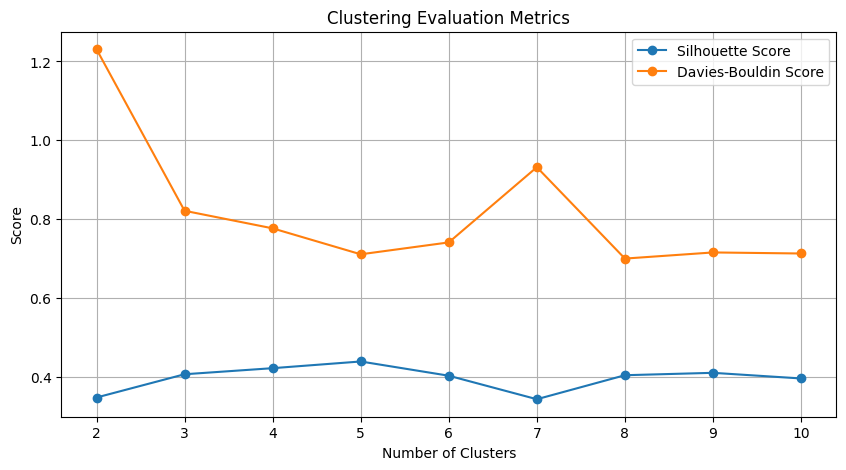

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans

# Initialize lists to store scores
silhouette_scores = []  # Initialize for silhouette scores
davies_bouldin_scores = []  # Initialize for Davies-Bouldin scores

# Define cluster range
cluster_range = range(2, 11)  # Start from 2 clusters (silhouette requires at least 2 clusters)

# Loop through cluster range to compute scores
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_features)
    silhouette_avg = silhouette_score(reduced_features, cluster_labels)
    davies_bouldin = davies_bouldin_score(reduced_features, cluster_labels)

    # Append the computed scores to their respective lists
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin)

# Print the scores
print("Silhouette Scores:", silhouette_scores)
print("Davies-Bouldin Scores:", davies_bouldin_scores)

# Optional: Visualize the scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(cluster_range, davies_bouldin_scores, marker='o', label='Davies-Bouldin Score')
plt.title("Clustering Evaluation Metrics")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Final clustering
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal Number of Clusters: {optimal_clusters}")

Optimal Number of Clusters: 5


In [ ]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(reduced_features)


In [ ]:
# Evaluate the final clustering
final_silhouette = silhouette_score(reduced_features, df['Cluster'])
final_davies_bouldin = davies_bouldin_score(reduced_features, df['Cluster'])

In [ ]:
print(f"Final Silhouette Score: {final_silhouette:.2f}")
print(f"Final Davies-Bouldin Index: {final_davies_bouldin:.2f}")

Final Silhouette Score: 0.44
Final Davies-Bouldin Index: 0.71


In [ ]:
# Post-clustering analysis (if true labels are available)
if 'Asthma' in df.columns and len(df['Asthma'].unique()) > 1:
    true_labels = y_resampled
    predicted_labels = df['Cluster']

    # Align clusters to labels
    cm = confusion_matrix(true_labels, predicted_labels)
    unique_labels = np.unique(np.concatenate([true_labels, predicted_labels]))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    disp.plot(cmap="viridis")
    plt.title("Confusion Matrix (True Labels vs Clusters)")
    plt.show()

In [ ]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)


In [ ]:
# Display the scores
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.64
Precision: 1.00
Recall: 0.64


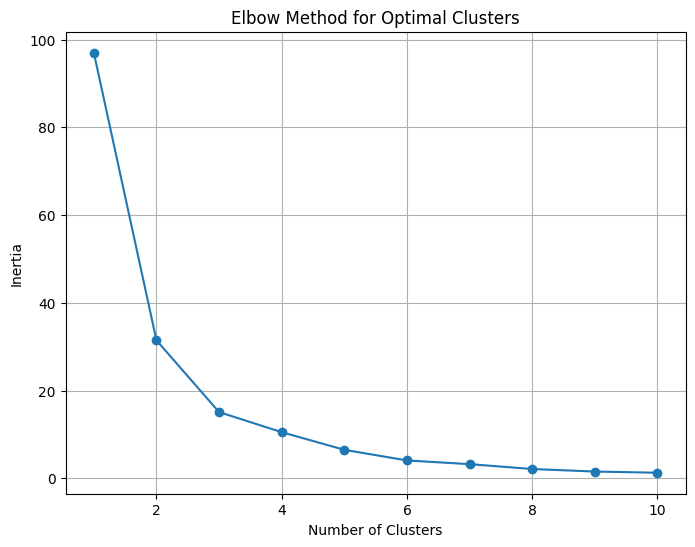

   Average C.PEFR  PEFR_scaled  Cluster  Severity
1          501.31     1.283733        0      Mild
2          467.17     0.959175        0      Mild
3          320.15    -0.438498        1  Moderate
4          320.15    -0.438498        1  Moderate
5          443.61     0.735197        2    Severe


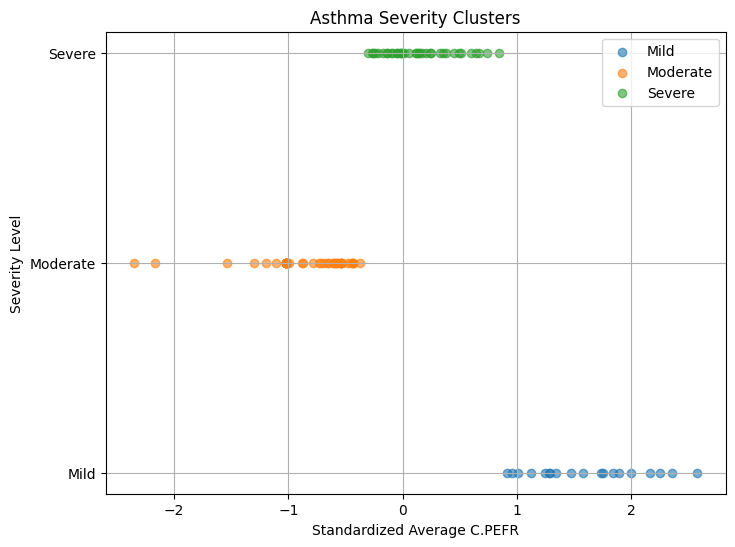

In [ ]:
# Extract the relevant column for clustering
pefr_column = "Average C.PEFR"
df = df[[pefr_column]].copy()

# Handle missing values
df[pefr_column] = pd.to_numeric(df[pefr_column], errors='coerce')  # Convert to numeric if needed
df.dropna(inplace=True)  # Drop rows with missing values

# Standardize the data
scaler = StandardScaler()
df['PEFR_scaled'] = scaler.fit_transform(df[[pefr_column]])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['PEFR_scaled']])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Perform KMeans clustering with the chosen number of clusters (e.g., 3)
optimal_clusters = 3  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['PEFR_scaled']])

# Map clusters to severity levels based on cluster centroids
centroids = kmeans.cluster_centers_.flatten()
severity_mapping = {
    i: severity
    for i, severity in sorted(
        enumerate(['Mild', 'Moderate', 'Severe']),
        key=lambda x: centroids[x[0]]
    )
}
df['Severity'] = df['Cluster'].map(severity_mapping)

# Display results
print(df.head())

# Visualize the clusters
plt.figure(figsize=(8, 6))
for severity, group in df.groupby('Severity'):
    plt.scatter(group['PEFR_scaled'], [severity] * len(group), label=severity, alpha=0.6)
plt.title('Asthma Severity Clusters')
plt.xlabel('Standardized Average C.PEFR')
plt.ylabel('Severity Level')
plt.legend()
plt.grid()
plt.show()

# Save results to a CSV file
df.to_csv("asthma_severity_clusters.csv", index=False)


In [ ]:
df.columns

Index(['Average C.PEFR', 'PEFR_scaled', 'Cluster', 'Severity'], dtype='object')

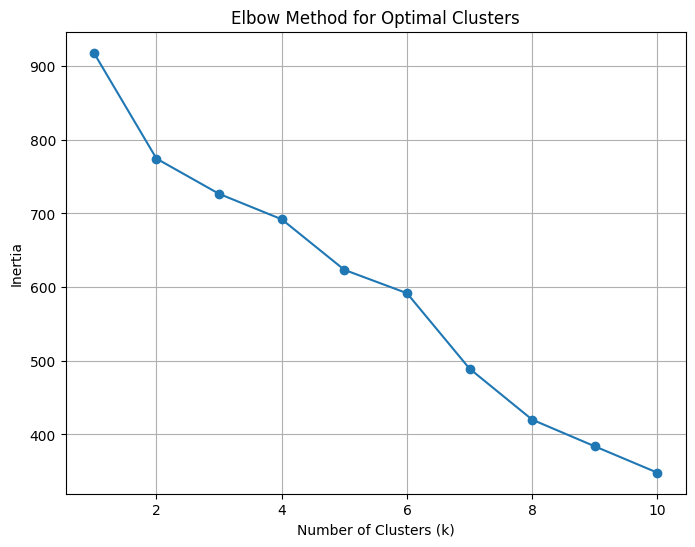

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features for clustering
features = ['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI', 'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature', 'Cluster']
df = df[features].copy()

# Replace 'No data' with NaN and handle missing values
df.replace('No data', np.nan, inplace=True)
df['Average C.PEFR'] = pd.to_numeric(df['Average C.PEFR'], errors='coerce')  # Ensure numeric
df.dropna(inplace=True)  # Drop rows with missing values

# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Encode 'Sex' (e.g., M/F)

cluster_encoding = {'Low': 0, 'Moderate': 1, 'High': 2}
df['Cluster_Encoded'] = df['Cluster'].map(cluster_encoding)

# Select only numerical columns for standardization and clustering
numeric_features = ['Age', 'BMI', 'Smoke_amount', 'Average C.PEFR', 'AQI', 'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature', 'Cluster_Encoded']
df_numeric = df[numeric_features]

# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix (True Labels vs Clusters)")
plt.show()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)

# Display the scores
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

NameError: name 'cm' is not defined

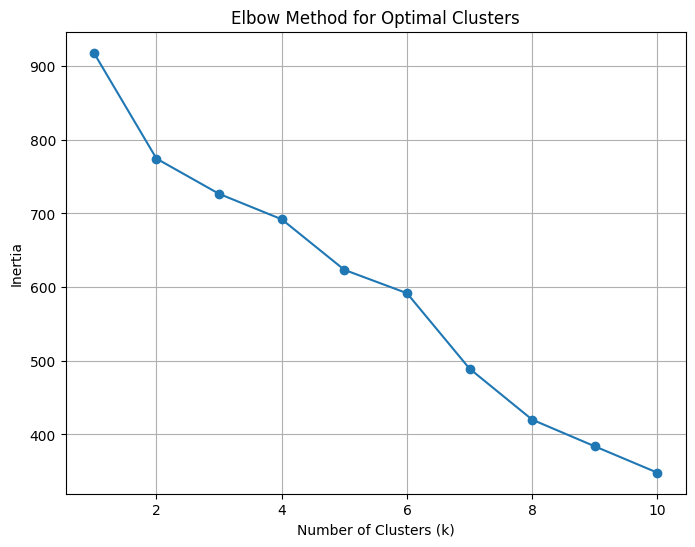

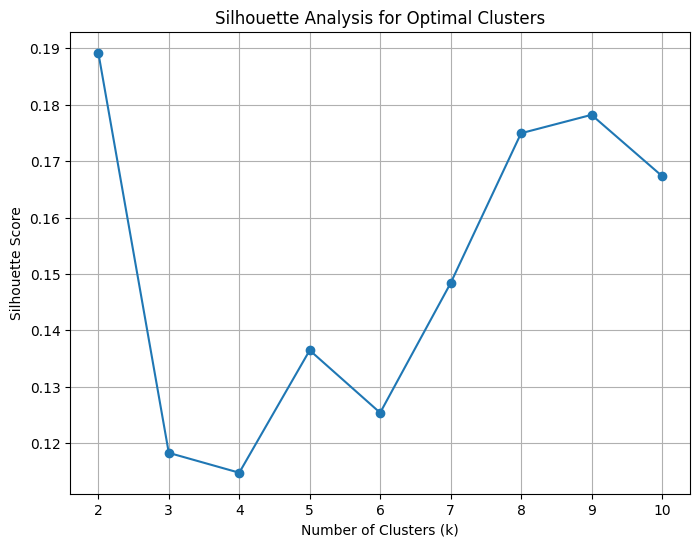

Optimal number of clusters according to Elbow Method: 10
Optimal number of clusters according to Silhouette Analysis: 2


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df_scaled is the standardized dataset
# Elbow Method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Silhouette Analysis
silhouette_scores = []

for k in range(2, 11):  # Silhouette Score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Print Optimal Number of Clusters
optimal_k_elbow = cluster_range[inertia.index(min(inertia))]
optimal_k_silhouette = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]

print(f"Optimal number of clusters according to Elbow Method: {optimal_k_elbow}")
print(f"Optimal number of clusters according to Silhouette Analysis: {optimal_k_silhouette}")

EDA for Silhouette Optimal Clusters (k=2):
                 Age        BMI       Sex  Smoke_amount  Average C.PEFR  \
Cluster_2                                                                 
0          66.975610  23.355026  0.317073      7.292683      466.746098   
1          63.819672  23.592808  0.426230      2.049180      299.699836   

           Standard Deviation PEFR  mean_humidity  mean_temperature  \
Cluster_2                                                             
0                        38.047317      70.062927         11.217317   
1                        25.834098      69.079508         11.114426   

           Cluster_Encoded  Cluster_2  Cluster_10  
Cluster_2                                          
0                 0.146341        0.0    3.658537  
1                 1.508197        1.0    6.721311  


<ipython-input-17-14b130ac711d>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster_2', data=df, palette='viridis')


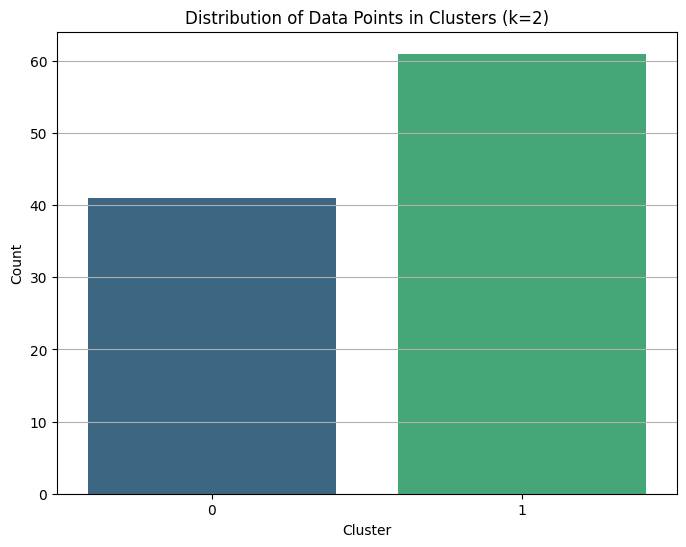

EDA for Elbow Optimal Clusters (k=10):
                  Age        BMI       Sex  Smoke_amount  Average C.PEFR  \
Cluster_10                                                                 
0           68.400000  22.573410  0.600000     14.600000      450.980000   
1           61.625000  22.943409  0.500000      4.500000      355.996250   
2           68.500000  23.347139  0.000000      0.000000      328.370000   
3           48.111111  24.425079  0.000000      2.888889      523.652222   
4           75.200000  22.583928  0.400000      0.050000      439.884500   
5           63.000000  23.808690  0.000000     15.000000      637.680000   
6           53.133333  22.754604  0.466667      0.200000      285.247333   
7           62.200000  24.663042  0.200000     41.000000      421.388000   
8           72.000000  21.954148  0.454545      0.681818      303.643636   
9           65.000000  27.378016  0.400000      3.333333      296.308000   

            Standard Deviation PEFR  mean_humidi

<ipython-input-17-14b130ac711d>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster_10', data=df, palette='viridis')


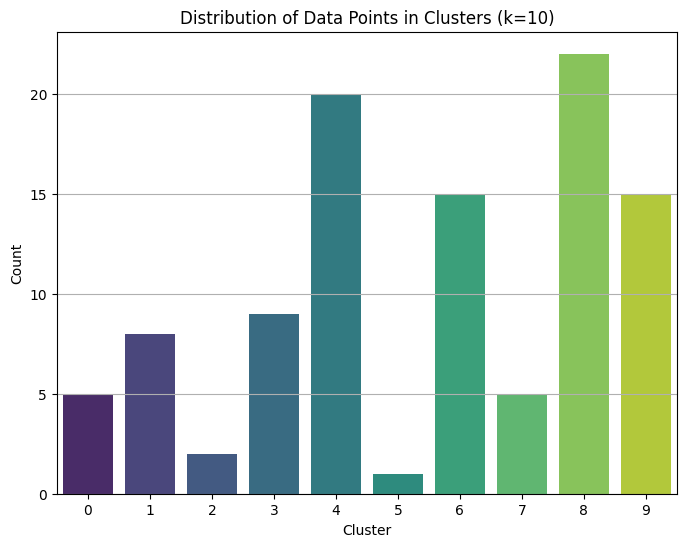

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming df_scaled is the scaled dataset and df is the original dataset

# Choose the number of clusters based on silhouette analysis (k=2) and elbow method (k=10)
optimal_clusters_silhouette = 2
optimal_clusters_elbow = 10

# Perform clustering for both cases
kmeans_2 = KMeans(n_clusters=optimal_clusters_silhouette, random_state=42)
df['Cluster_2'] = kmeans_2.fit_predict(df_scaled)

kmeans_10 = KMeans(n_clusters=optimal_clusters_elbow, random_state=42)
df['Cluster_10'] = kmeans_10.fit_predict(df_scaled)

# Select only numeric columns for aggregation
numeric_columns = df.select_dtypes(include=[np.number]).columns

# EDA for Silhouette Optimal Clusters (k=2)
print("EDA for Silhouette Optimal Clusters (k=2):")
print(df.groupby('Cluster_2')[numeric_columns].mean())

plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster_2', data=df, palette='viridis')
plt.title('Distribution of Data Points in Clusters (k=2)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


# EDA for Elbow Optimal Clusters (k=10)
print("EDA for Elbow Optimal Clusters (k=10):")
print(df.groupby('Cluster_10')[numeric_columns].mean())

plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster_10', data=df, palette='viridis')
plt.title('Distribution of Data Points in Clusters (k=10)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()




(102, 3)


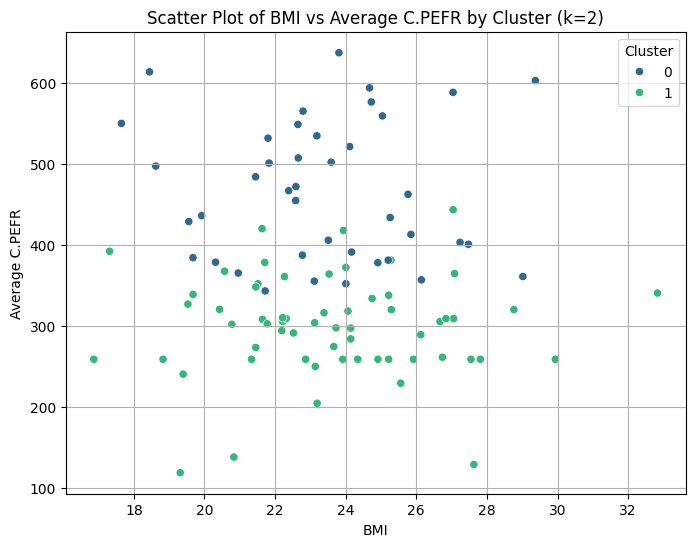

In [ ]:
# Ensure that 'BMI', 'Average C.PEFR', and 'Cluster_2' are 1-dimensional
df['Cluster_2'] = df['Cluster_2'].astype(int)  # Ensure cluster labels are integers

# Check the dimensions of the required columns
print(df[['BMI', 'Average C.PEFR', 'Cluster_2']].shape)  # Should output (n_rows, 3)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='BMI', y='Average C.PEFR', hue='Cluster_2', palette='viridis')
plt.title('Scatter Plot of BMI vs Average C.PEFR by Cluster (k=2)')
plt.xlabel('BMI')
plt.ylabel('Average C.PEFR')
plt.grid()
plt.legend(title='Cluster')
plt.show()



<ipython-input-19-cb565b058583>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_2', y=feature, data=df, palette='viridis')


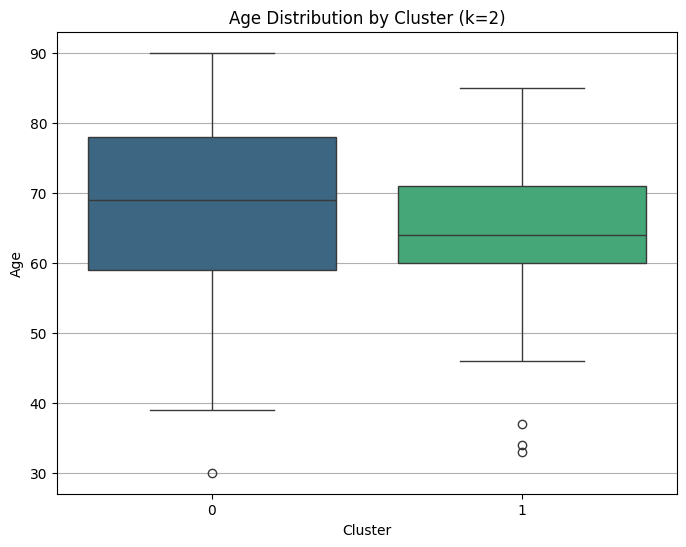

<ipython-input-19-cb565b058583>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_2', y=feature, data=df, palette='viridis')


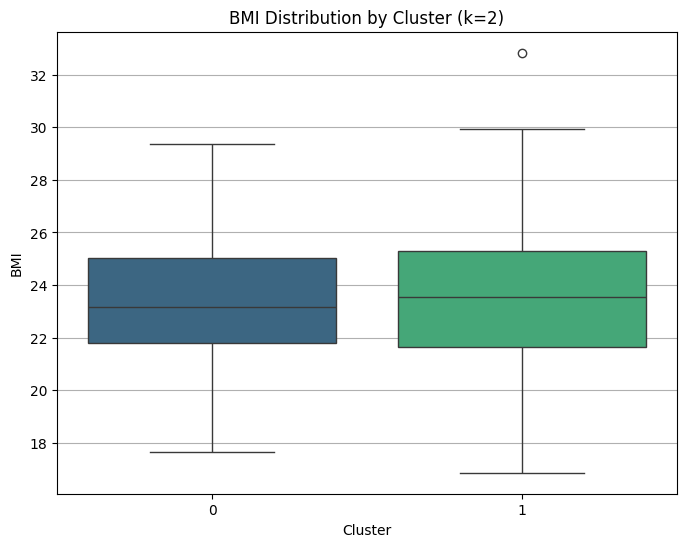

<ipython-input-19-cb565b058583>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_2', y=feature, data=df, palette='viridis')


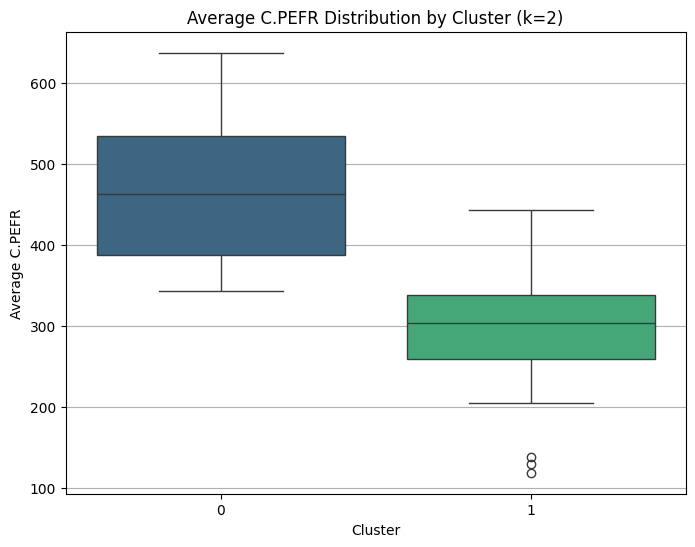

<ipython-input-19-cb565b058583>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_2', y=feature, data=df, palette='viridis')


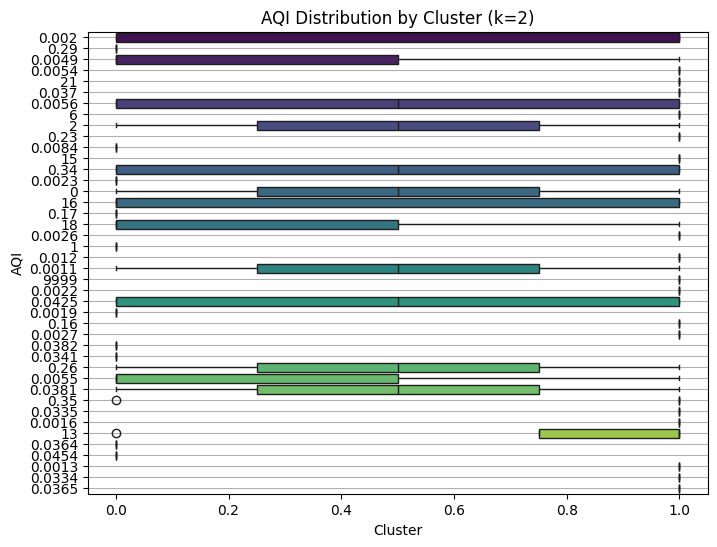

In [ ]:
# Box plot for selected features and clusters
features_to_plot = ['Age', 'BMI', 'Average C.PEFR', 'AQI']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster_2', y=feature, data=df, palette='viridis')
    plt.title(f'{feature} Distribution by Cluster (k=2)')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(axis='y')
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' contains the dataset and we want to normalize all numeric columns except cluster labels
# Exclude columns that shouldn't be normalized (e.g., Cluster_2 if already present)
columns_to_normalize = ['Age', 'BMI', 'Smoke_amount', 'Average C.PEFR', 'AQI',
                        'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature']

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max normalization
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Verify the normalized data
print("Normalized Data:")
print(df[columns_to_normalize].head())


Normalized Data:
        Age       BMI  Smoke_amount  Average C.PEFR           AQI  \
1  0.600000  0.310917      0.000000        0.737290  2.000200e-07   
2  0.516667  0.345766      0.333333        0.671521  2.900290e-05   
3  0.316667  0.527810      0.000000        0.388295  4.900490e-07   
4  0.383333  0.745250      0.000000        0.388295  2.000200e-07   
5  0.566667  0.637367      0.283333        0.626134  5.400540e-07   

   Standard Deviation PEFR  mean_humidity  mean_temperature  
1                 0.232149       0.542688          0.633333  
2                 0.065343       0.818259          0.651515  
3                 0.078270       0.845309          0.596970  
4                 0.029127       0.542688          0.633333  
5                 0.119394       0.000000          0.683333  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold

# Assuming df_scaled is the normalized dataset
# Parameters for k-fold cross-validation
n_splits = 5  # Number of folds
k_values = range(2, 11)  # Range of clusters to evaluate
results = []  # To store results

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform k-fold cross-validation for each k in k_values
for k in k_values:
    silhouette_scores = []  # To store silhouette scores for each fold

    for train_index, test_index in kf.split(df_scaled):
        # Split the data into training and testing
        train_data, test_data = df_scaled[train_index], df_scaled[test_index]

        # Apply KMeans clustering
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(train_data)

        # Predict cluster labels for the test data
        cluster_labels = kmeans.predict(test_data)

        # Calculate the silhouette score
        silhouette_avg = silhouette_score(test_data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Store the results for this k
    results.append({
        'k': k,
        'Silhouette_Score_Mean': np.mean(silhouette_scores),
        'Silhouette_Score_Std': np.std(silhouette_scores)
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save results to a CSV file
output_file = 'kmeans_kfold_results.csv'
results_df.to_csv(output_file, index=False)

print(f"Results saved to {output_file}")


Results saved to kmeans_kfold_results.csv
